In [28]:
import pandas as pd
import matplotlib as plt
import numpy as np
import os

In [29]:
data = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
y = data['Diabetes_012']
data = data.drop(labels="Diabetes_012", axis=1)
data

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [30]:
data.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >], dtype=object)

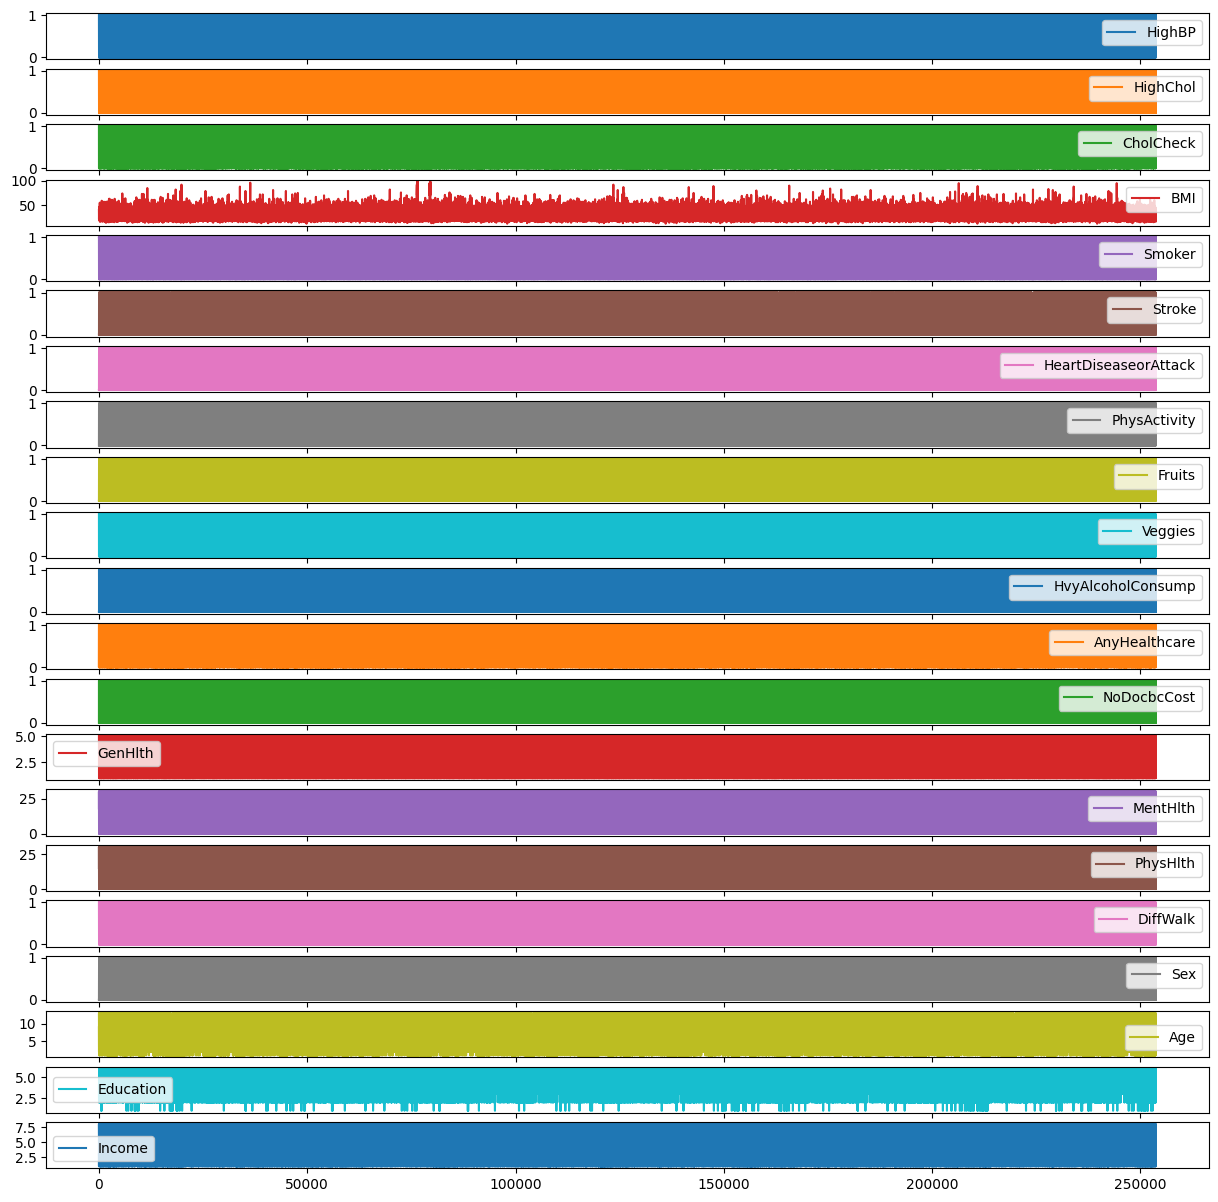

In [31]:
data.plot(figsize=(15,15), subplots=True)

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [35]:
scaled_data

array([[1.        , 1.        , 1.        , ..., 0.66666667, 0.6       ,
        0.28571429],
       [0.        , 0.        , 0.        , ..., 0.5       , 1.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.66666667, 0.6       ,
        1.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.08333333, 0.8       ,
        0.14285714],
       [1.        , 0.        , 1.        , ..., 0.5       , 0.8       ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.66666667, 1.        ,
        0.14285714]])

In [36]:
X = data.values
y = y.values

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [39]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [3:46:20<00:00, 468.31s/it]   


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.67,0.49,None,0.74,0.37
GaussianNB,0.75,0.46,None,0.77,0.40
BernoulliNB,0.80,0.46,None,0.80,0.39
QuadraticDiscriminantAnalysis,0.75,0.45,None,0.77,0.57
Perceptron,0.81,0.43,None,0.80,0.91
PassiveAggressiveClassifier,0.80,0.42,None,0.79,0.91
DecisionTreeClassifier,0.77,0.41,None,0.77,1.31
ExtraTreeClassifier,0.78,0.40,None,0.78,0.57
LinearDiscriminantAnalysis,0.84,0.40,None,0.81,0.85


In [42]:
from sklearn.ensemble import AdaBoostClassifier

In [43]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ada.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.54      0.21      0.31      6997

    accuracy                           0.85     50736
   macro avg       0.47      0.40      0.41     50736
weighted avg       0.81      0.85      0.82     50736



In [45]:
from sklearn.model_selection import GridSearchCV

ada1 = AdaBoostClassifier()
param_grid = {
    'n_estimators': [10, 20, 100],
    'algorithm':["SAMME","SAMME.R"],
    'random_state':[0, 1, 42]
}

CV_ada1 = GridSearchCV(estimator=ada1, param_grid=param_grid, cv= 5, scoring='accuracy')
CV_ada1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': [10, 20, 100],
                         'random_state': [0, 1, 42]},
             scoring='accuracy')

In [46]:
ada2 = AdaBoostClassifier(n_estimators=CV_ada1.best_params_["n_estimators"], random_state=CV_ada1.best_params_["random_state"], algorithm=CV_ada1.best_params_["algorithm"])
ada2.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [47]:
print(classification_report(y_test, ada2.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.54      0.22      0.31      6997

    accuracy                           0.85     50736
   macro avg       0.47      0.40      0.41     50736
weighted avg       0.81      0.85      0.82     50736

